In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install emoji

In [28]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier



from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalMaxPooling1D,Embedding,Dense, LSTM

from sklearn.metrics import accuracy_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/clean_chatgpt_reviews.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149719 entries, 0 to 149718
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     149719 non-null  int64 
 1   userName       149719 non-null  object
 2   content        149719 non-null  object
 3   score          149719 non-null  int64 
 4   thumbsUpCount  149719 non-null  int64 
 5   at             149719 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [ ]:
df

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50
...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,27-07-2023 16:26
149715,149721,Andrew Bourgeois,its grear,5,0,23-09-2023 16:25
149716,149722,Dern Bob,Funtastic App,5,0,08-11-2023 13:57
149717,149723,Abdur rahman arif,hi all,5,0,25-07-2023 15:32


In [ ]:
#mengecek apakah terdapat data kosong
df.isnull().sum()

Unnamed: 0       0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [ ]:
#Membuang bagian 'Unnamed:0' dan 'at', karena data tidak digunakan
df.drop(columns=['Unnamed: 0', 'at'], inplace=True)

In [ ]:
df

,userName,content,score,thumbsUpCount
0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0
1,Muhammad bassam adam,perfect,5,0
2,Chinaza Okoli,its been so helpful...love it,5,0
3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0
4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0
...,...,...,...,...
149714,m.santhosh Kumar,Update 2023,5,0
149715,Andrew Bourgeois,its grear,5,0
149716,Dern Bob,Funtastic App,5,0
149717,Abdur rahman arif,hi all,5,0


In [ ]:
#mencari apakah thumbsUpCount terdapat nilai diatas 0
df[df['thumbsUpCount'] > 0]


,userName,content,score,thumbsUpCount
153,탱탱탱탱퉁탱통,For those experiencing network errors with the...,5,3
548,Viwaan Singh,Im the chatgtp app 1 star because im making a ...,1,2
593,J RV,"3.5 understands me just fine, but 4.0 barely c...",4,1
618,Greg Crawford,Please add a stop button so that you can stop ...,3,24
651,ismael montano,Its just a dumber but faster Google,1,1
...,...,...,...,...
149072,Ryan Chisango,Sucks,1,1
149075,Mohanad Wael,مقتعه,1,1
149097,X MAFIYA BD,😉,1,1
149625,REMONTADA FF,جيد جدا,5,1


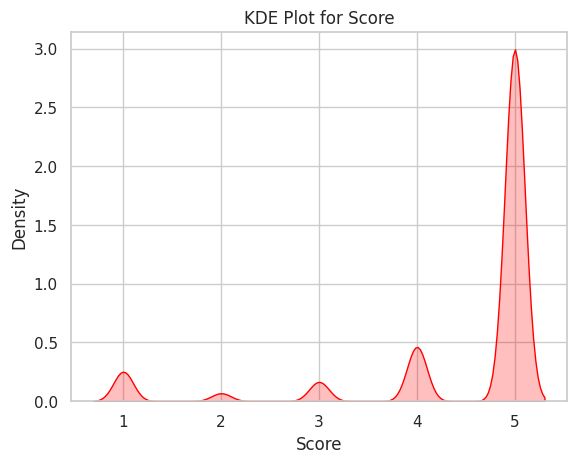

In [ ]:
sns.set(style="whitegrid")

# Membuat KDE Plot
sns.kdeplot(x='score', data=df, fill=True, color='red')

# Atur label dan judul
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('KDE Plot for Score')

# Tampilkan plot
plt.show()

Interpretasi

---


1.   Berdasarkan distribusi data tersebut, terdapat nilai 5 yang lebih dominan
2.   Dapat diketahui bahwa rating positive diberikan oleh user




In [ ]:
#Mengganti data score menjadi data kategori : Positive, Negative, Netral
#2: Negative, 1: Positive, 0: Netral
df['score'] = df['score'].replace([1,2], 2)
df['score'] = df['score'].replace(3, 0)
df['score'] = df['score'].replace([4,5], 1)

In [ ]:
df.score.value_counts()

score
1    131319
2     12144
0      6256
Name: count, dtype: int64

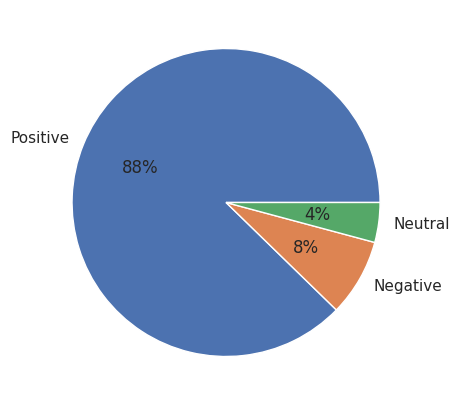

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df.score.value_counts(), labels = ['Positive', 'Negative', 'Neutral'], autopct='%.0f%%')
plt.show()

Interpretasi


---

Dari Score yang diberikan user dari ChatGPT terdapat 88% memberikan score positive (4 - 5).

In [ ]:
#mencari user dengan thumbUpCount 10 tertinggi dengan minimal 500 thumbsUpCount

top_users = df[df['thumbsUpCount'] >= 500].sort_values('thumbsUpCount', ascending=False).head(10)
print(top_users)


                   userName  \
38148     Jonathan Lawrence   
38141           Haris Bilal   
37510                  Asif   
38140  Radley Seann Cayanan   
38166          Dee Thompson   
42785                 Steve   
37820           T Neighbors   
42775      Isaiah Rodriguez   
42780          Alex Ledford   
38143               Patrick   

                                                 content  score  thumbsUpCount  
38148  it's really brilliant, I mean it's dumb as a b...      1           1193  
38141  Certainly! Here's a review based on your feedb...      1           1068  
37510  ChatGPT is an incredible app that delivers lig...      1           1017  
38140  "I am absolutely thrilled with the ChatGPT And...      1            971  
38166  Still learning this app and everything in it. ...      2            941  
42785  This is amazing technology. What it needs righ...      0            893  
37820  Mind blowing tech. The app works great too. Th...      1            881  
42775  NO 

In [ ]:
#Data Cleansing bagian Content
def data_cleansing(text):
    #Tahap Pertama Adalah Membuat semua huruf menjadi huruf kecil atau lower
    text = text.lower()

    #Tahap Kedua adalah menghilangkan non alpha numeric character pada text
    text = re.sub('[^0-9a-zA-Z]+',' ',text)

    #Tahap Ketiga adalah menghilangkan char tidak penting
    text=re.sub('\n',' ',text) #Menghilangkan new line pada data
    text=re.sub('rt',' ',text) #Menghilangkan kata-kata retweet
    text=re.sub('user',' ',text) #Menghilangkan kata-kata user
    text=re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) #Menghilangkan  URL
    text=re.sub(' +',' ',text) #Menghilangkan ekstra spasi
    text=re.sub(r'[^\x00-\x7f]',r' ',text) #Menghilangkan non-ascii
    text=emoji.replace_emoji(text, replace='') #Menghilangkan emoji

    return text

In [ ]:
df['content'] = df['content'].apply(data_cleansing)

In [ ]:
def lemm(df):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(df)):
        lemmed = []
        words = word_tokenize(df['content'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    df['lemmanized'] = lemmanized
    df['content'] = df['lemmanized'].apply(' '.join)
    df=df.drop("lemmanized",axis=1)
    return df
df=lemm(df)

In [ ]:
df

,userName,content,score,thumbsUpCount
0,T H (Trudylh20),excellent im impressed,1,0
1,Muhammad bassam adam,perfect,1,0
2,Chinaza Okoli,it been so helpful love it,1,0
3,Project House Group Ltd,it s amazing tool help me a lot with my work,1,0
4,Safoan Riyad,i enjoyed chatgpt but last update ruined every...,2,0
...,...,...,...,...
149714,m.santhosh Kumar,update 2023,1,0
149715,Andrew Bourgeois,it grear,1,0
149716,Dern Bob,funtastic app,1,0
149717,Abdur rahman arif,hi all,1,0


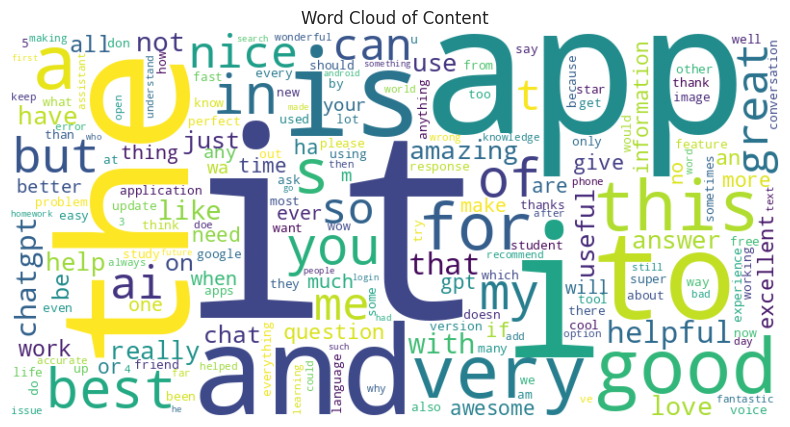

In [ ]:
#menampilkan grafik kata, kata apa saja yang sering muncul dari content

from collections import Counter
from wordcloud import WordCloud

# Gabungkan semua teks dalam kolom 'content' menjadi satu string
all_text = ' '.join(df['content'])

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(all_text.split())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()


In [ ]:
#Data Modeling
x = df['content']
y = df['score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
model= LogisticRegression(multi_class="multinomial")
model.fit(x_train,y_train)
preds =model.predict(x_test)

print(accuracy_score(y_test, preds))

0.9081952978893936


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
names_of_models=[
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'Support Vector Machine',
    'Naive Bayes',
    'KNeighborsClassifier'
]
models={
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'Support Vector Machine': LinearSVC(),
    'Naive Bayes': MultinomialNB(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [27]:
accuracies=[]

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)

    AS=accuracy_score(y_test, y_pred)
    accuracies.append(AS)

    print(f'Results for {name}')
    print('Accuracy score:', AS)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LogisticRegression
Accuracy score: 0.9081952978893936

Results for DecisionTreeClassifier
Accuracy score: 0.8784063585359337

Results for RandomForestClassifier
Accuracy score: 0.9021506812717072



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Results for Support Vector Machine
Accuracy score: 0.9071266363879241

Results for Naive Bayes
Accuracy score: 0.8933008282126637

Results for KNeighborsClassifier
Accuracy score: 0.891497461928934



In [31]:

data1 = pd.DataFrame({'Names': names_of_models, 'Accuracies': accuracies}).sort_values(by=['Accuracies'], ascending=False)

# Reset indeks DataFrame
data1 = data1.reset_index(drop=True)

# Menampilkan DataFrame
print(data1)

                    Names  Accuracies
0      LogisticRegression    0.908195
1  Support Vector Machine    0.907127
2  RandomForestClassifier    0.902151
3             Naive Bayes    0.893301
4    KNeighborsClassifier    0.891497
5  DecisionTreeClassifier    0.878406
